In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [62]:
dgp = "poly" # "linear", "poly", "lss"
data = "temperature"
ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}/varying_heritability"
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/auroc/linear/'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [63]:
combined_df

,rep,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,test_size,num_features,data_split_seed,auroc_train,auprc_train,auroc_test,auprc_test,split_seed
0,0,0.1,0.1,100,5,0.33,42,RF,LIME_RF,683,337,46,1,0.681314,0.416192,0.682381,0.415301,1
1,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_Alo_fit_on_all_RFPlus,683,337,46,1,0.636920,0.305613,0.634310,0.303273,1
2,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_Alo_fit_on_all_ranking_RFPlus,683,337,46,1,0.737274,0.393953,0.735108,0.391181,1
3,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_MDI_fit_on_all_ranking_RFPlus,683,337,46,1,0.737168,0.394115,0.735108,0.391181,1
4,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,683,337,46,1,0.889184,0.618186,0.889954,0.619344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0,0.8,0.8,100,5,0.33,42,RF,Local_MDI+_MDI_fit_on_all_ranking_RFPlus,683,337,46,1,0.852883,0.610872,0.853926,0.609349,1
316,0,0.8,0.8,100,5,0.33,42,RF,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,683,337,46,1,0.883059,0.679782,0.883185,0.679966,1
317,0,0.8,0.8,100,5,0.33,42,RF,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,683,337,46,1,0.804036,0.590667,0.806386,0.591153,1
318,0,0.8,0.8,100,5,0.33,42,RF,Random,683,337,46,1,0.494766,0.198741,0.506726,0.200490,1


##### Plot AUROC/RBO Performance

In [64]:
combined_df["train_size"].unique()

array([683])

In [65]:
combined_df["test_size"].unique()

array([337])

In [66]:
result_df = combined_df.groupby(['train_size', 'heritability', 'fi'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [67]:
result_df

,train_size,heritability,fi,auroc_train,auroc_test
0,683,0.1,LIME_RF,0.659342,0.656334
1,683,0.1,Local_MDI+_Alo_fit_on_all_RFPlus,0.680239,0.677669
2,683,0.1,Local_MDI+_Alo_fit_on_all_ranking_RFPlus,0.746527,0.746115
3,683,0.1,Local_MDI+_MDI_fit_on_all_ranking_RFPlus,0.746635,0.746115
4,683,0.1,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,0.858610,0.858519
5,683,0.1,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,0.744581,0.743816
6,683,0.1,Random,0.498294,0.500946
7,683,0.1,TreeSHAP_RF,0.754556,0.756916
8,683,0.2,LIME_RF,0.681002,0.677893
9,683,0.2,Local_MDI+_Alo_fit_on_all_RFPlus,0.700634,0.699259


In [68]:
methods = [
        #'Random',
        'LIME_RF', 
       'Local_MDI+_Alo_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
       'TreeSHAP_RF',
       'Local_MDI+_Alo_fit_on_all_RFPlus'
       ]
color_map = {
    'Random': 'gray',  # Assign a default neutral color for Random
    'LIME_RF': '#71BEB7',
    'Local_MDI+_Alo_fit_on_all_ranking_RFPlus': '#FF5733',  # Example bright color
    'Local_MDI+_MDI_fit_on_all_ranking_RFPlus': '#33FF57',  # Example greenish color
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Example blueish color
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#FF33A1',  # Example pinkish color
    'TreeSHAP_RF': 'orange',
    'Local_MDI+_Alo_fit_on_all_RFPlus': '#8E44AD'  # Example purple color
}


In [69]:
# method_names = {'TreeSHAP_RF': 'SHAP', 'Local_MDI+_fit_on_all_ranking_RFPlus': "LMDI+", 'LIME_RF': 'LIME'}

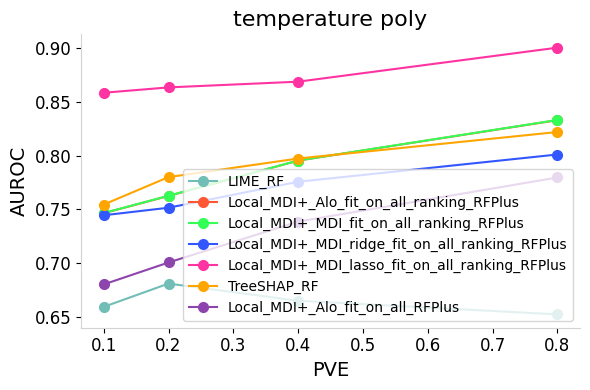

In [70]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(6, 4))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    ax.plot(
        subset['heritability'], subset['auroc_train'],
        label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
    )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel('PVE', fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=10, title_fontsize=12, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig('auroc_lss.png')
plt.show()

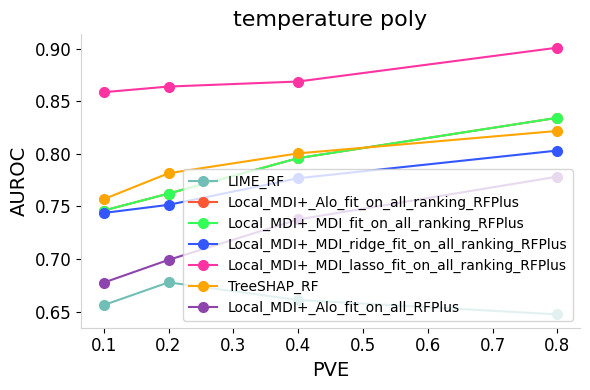

In [71]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(6, 4))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    ax.plot(
        subset['heritability'], subset['auroc_test'],
        label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
    )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel('PVE', fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=10, title_fontsize=12, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig('auroc_lss.png')
plt.show()
